In [19]:
import pandas as pd
import numpy as np

file_path = "Position_paris_reims.csv"
data = pd.read_csv(file_path)

In [20]:
print(data.head())

   time_minutes  position_km
0          0.00         1.81
1          7.48         4.62
2          8.21         7.10
3          9.27         8.55
4         10.10        10.43


In [28]:
time_array = np.array(data["time_minutes"])
position_array = np.array(data["position_km"])

print(time_array)
print(position_array)

[  0.     7.48   8.21   9.27  10.1   10.41  15.98  17.16  19.08  21.74
  21.94  22.57  24.67  28.9   30.    36.49  37.22  41.59  43.51  44.98
  46.99  47.84  48.55  49.5   52.41  52.91  53.78  54.26  55.62  57.54
  60.    60.94  67.46  67.95  73.56  77.88  80.04  87.06  88.06  88.28
  90.    92.49  93.91  96.85 100.32 105.55 106.7  107.79 112.94 120.  ]
[  1.81   4.62   7.1    8.55  10.43  12.51  14.63  18.33  21.64  24.88
  26.34  29.54  33.77  35.97  38.97  42.34  46.15  49.57  52.24  55.43
  57.45  60.84  63.23  64.95  68.66  70.74  73.01  76.96  78.93  80.66
  82.76  84.33  88.46  92.4   96.38  99.48 103.42 105.01 109.   112.42
 115.45 119.51 121.29 124.47 126.42 128.96 132.71 134.72 136.2  140.  ]


In [35]:
delta_position = position_array[-1] - position_array[0]
delta_time = time_array[15] - time_array[0]

In [36]:
vitesse_moyenne = delta_position / delta_time

In [37]:
print(f"Vitesse moyenne entre 0 et 30 minutes : {vitesse_moyenne:.2f} km/min")

Vitesse moyenne entre 0 et 30 minutes : 3.79 km/min


Pour h = 0.1:
t_n	Euler	Exact	Erreur
0.00	1.0000	1.0000	0.0000
0.10	1.1000	1.1052	0.0000
0.20	1.2100	1.2214	0.0001
0.30	1.3310	1.3499	0.0004
0.40	1.4641	1.4918	0.0008
0.50	1.6105	1.6487	0.0015
0.60	1.7716	1.8221	0.0026
0.70	1.9487	2.0138	0.0042
0.80	2.1436	2.2255	0.0067
0.90	2.3579	2.4596	0.0103
1.00	2.5937	2.7183	0.0155
1.10	2.8531	3.0042	0.0228
1.20	3.1384	3.3201	0.0330
1.30	3.4523	3.6693	0.0471
1.40	3.7975	4.0552	0.0664
1.50	4.1772	4.4817	0.0927
1.60	4.5950	4.9530	0.1282
1.70	5.0545	5.4739	0.1760
1.80	5.5599	6.0496	0.2398
1.90	6.1159	6.6859	0.3249
2.00	6.7275	7.3891	0.4377
MSE: 0.0767



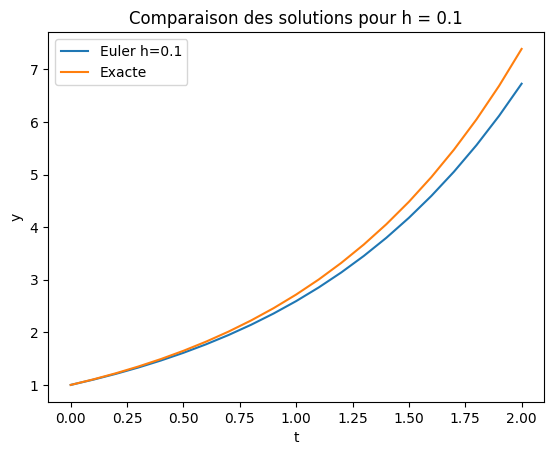

Pour h = 0.5:
t_n	Euler	Exact	Erreur
0.00	1.0000	1.0000	0.0000
0.50	1.5000	1.6487	0.0221
1.00	2.2500	2.7183	0.2193
1.50	3.3750	4.4817	1.2248
2.00	5.0625	7.3891	5.4129
MSE: 1.3758



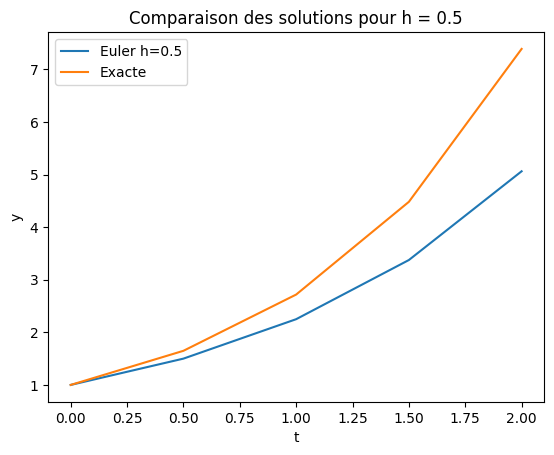

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0, len(t) - 1):
        y[n + 1] = y[n] + f(t[n], y[n]) * (t[n + 1] - t[n])
    return y

def f(t, y):
    return y

def exact_solution(t):
    return np.exp(t)

h_values = [0.1, 0.5]
t_start = 0
t_end = 2

for h in h_values:
    t = np.arange(t_start, t_end + h, h)
    y0 = 1 
    y_euler = euler_method(f, y0, t)
    y_exact = exact_solution(t)
    
    mse = np.mean((y_euler - y_exact) ** 2)
    
    print(f"Pour h = {h}:")
    print("t_n\tEuler\tExact\tErreur")
    for i in range(len(t)):
        print(f"{t[i]:.2f}\t{y_euler[i]:.4f}\t{y_exact[i]:.4f}\t{(y_euler[i] - y_exact[i]) ** 2:.4f}")
    print(f"MSE: {mse:.4f}\n")
    
    plt.plot(t, y_euler, label=f'Euler h={h}')
    plt.plot(t, y_exact, label='Exacte')
    plt.title(f"Comparaison des solutions pour h = {h}")
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.show()